<h1 style="font-size: 70px;text-align: center; font-family:Copperplate; color: darkblue">Fake News Detection</h1>


<div style = "height: 50px;
  width: 800px;
  background-color: darkblue;">
    <h1 style="padding: 10px;
              color:white;">
        <b>Table of Contents:</b>
    </h1>

</div>

<div>
    <ol>
        <li>
             EDA<br/>
            <ul>
                <li>1.1 Reading data</li>
                <li>1.2 Data Visualization of all News Titles</li>
                <li>1.3 Data Visualization of texts in fake news</li>
                <li>1.4 Data Visualization of texts in real news</li>
            </ul>
        </li>
        <li>
            Bag of Words Model<br/>
        </li><br/>
        <li>
            Naive Bayes Model<br/>
            <ul>
                <li>Predictions</li>
                <li>Evaluation</li>
                <li>Confusion Matrix</li><br/>
            </ul>
        </li>
        <li>
             Random Forest Model<br/>
             <ul>
                <li>Predictions</li>
                <li>Evaluation</li>
                <li>Confusion Matrix</li>
            </ul>
        </li>
        <li>
             Logistic Regression Model<br/>
             <ul>
                <li>Predictions</li>
                <li>Evaluation</li>
                <li>Confusion Matrix</li>
            </ul>
        </li><br/>
        <li>
            Comparative Analysis of Each Model<br/>
        </li>
        <br/>
    </ol>
</div>

In [ ]:
<!-- # EDA -->
<div id = "eda" style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>1.EDA</b>
    </h1>

</div>

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

<div id = "rd"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.1 Reading Data
    </h3>

</div>

In [2]:
df = pd.read_csv('WELFake_Dataset.csv')
df.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [3]:
df.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [5]:
y = df.label
print(f'Ratio of real and fake news:')
y.value_counts(normalize=True).rename({1: 'real', 0: 'fake'})

Ratio of real and fake news:


label
real    0.514404
fake    0.485596
Name: proportion, dtype: float64

In [6]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

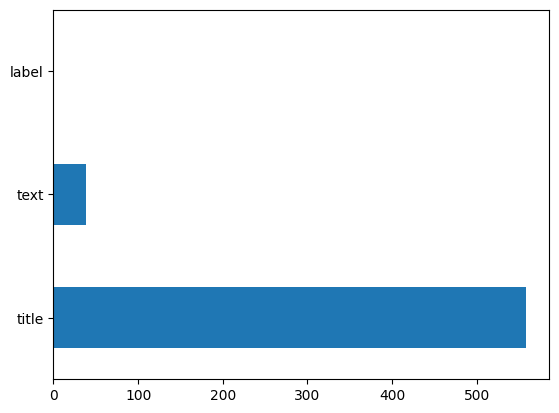

In [7]:
df.isnull().sum().plot(kind="barh")
plt.show()

<div style = "height: 210px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="
              color:black;
               ">
        <b>Observations:</b> 
        
 <p>
     <ol>
         <li>There are a total of 4 columns and 72134 rows in the data</li>
         <li>Label is the target variable</li>
         <li>Percentage of Real and fake News articles:<ul><li>real : 51%</li><li>fake :49%</li></ul></li>
         <li>Missing values are present in the dataset</li>
    </ol>
 </p>
    </h3>

</div>

In [8]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [9]:
df = df.fillna('')

In [10]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [11]:
df.nunique()

title    62348
text     62719
label        2
dtype: int64

In [12]:
df["title_text"] = df["title"] + df["text"]
df["body_len"] = df["title_text"].apply(lambda x: len(x) - x.count(" "))
df.head()

,title,text,label,title_text,body_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222
1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?,39
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",6811
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,1668


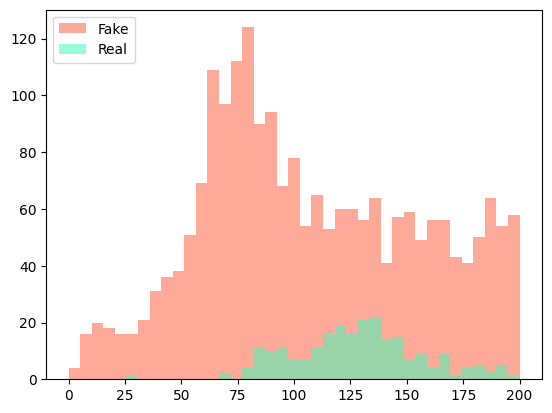

In [13]:
bins = np.linspace(0, 200, 40)

plt.hist(df[df["label"]== 1]["body_len"], bins, alpha=0.5, label="Fake", color="#FF5733")
plt.hist(df[df["label"]== 0]["body_len"], bins, alpha=0.5, label="Real", color="#33FFB8")
plt.legend(loc="upper left")
plt.show()

<div style = "height: 150px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="padding: 10px;
              color:black;
               ">
        <b>Insights :</b> 
        <br></br>
       
 <i>Fake news seem to be quite a bit longer than real news.</i>
    </h3>

</div>

Text(0.5, 1.0, 'Distribution of Fake/Real News')

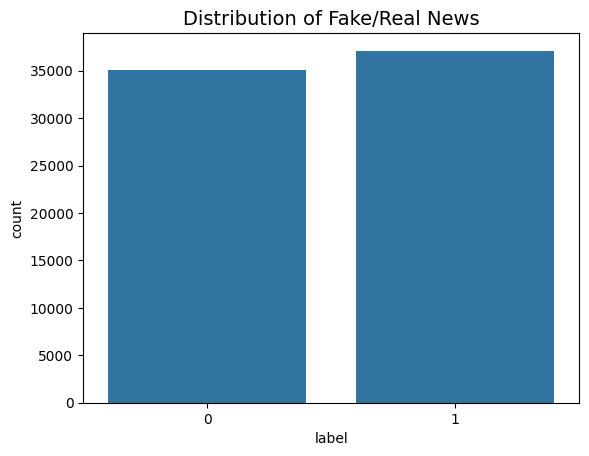

In [14]:
class_names = ['fake', 'real'] 
label_count = df.label.value_counts()
sns.barplot(x=label_count.index, y=label_count)
plt.title('Distribution of Fake/Real News',fontsize =14)

In [15]:

y.head()

0    1
1    1
2    1
3    0
4    1
Name: label, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [ ]:
<div id = "nt"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.2 Data Visualization of all News Titles
    </h3>

</div>

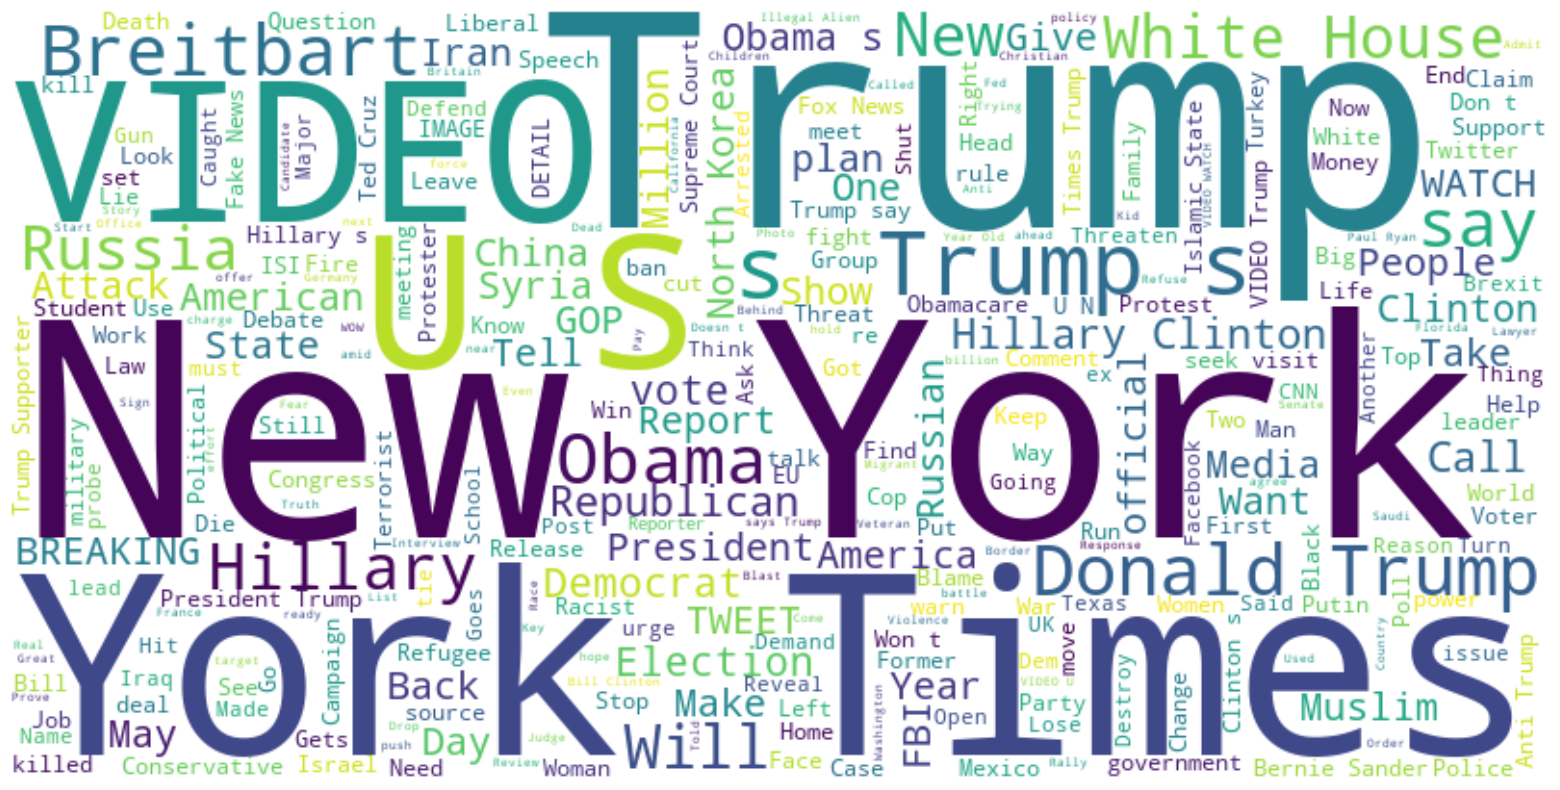

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all titles into a single string
titles = ' '.join(title for title in df['title'])

# Generate the word cloud
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(titles)

# Display the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


<div style = "height: 110px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="
              color:black;
               ">
        <b>Quick Insights:</b> 
        
 <p>
     <ul>
         <li>many of available news articles are about elections and presidents of USA </li>
    </ul>
 </p>
    </h3>

</div>

<div id = "ft"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.3 Data Visualization of texts in fake news
    </h3>

</div>

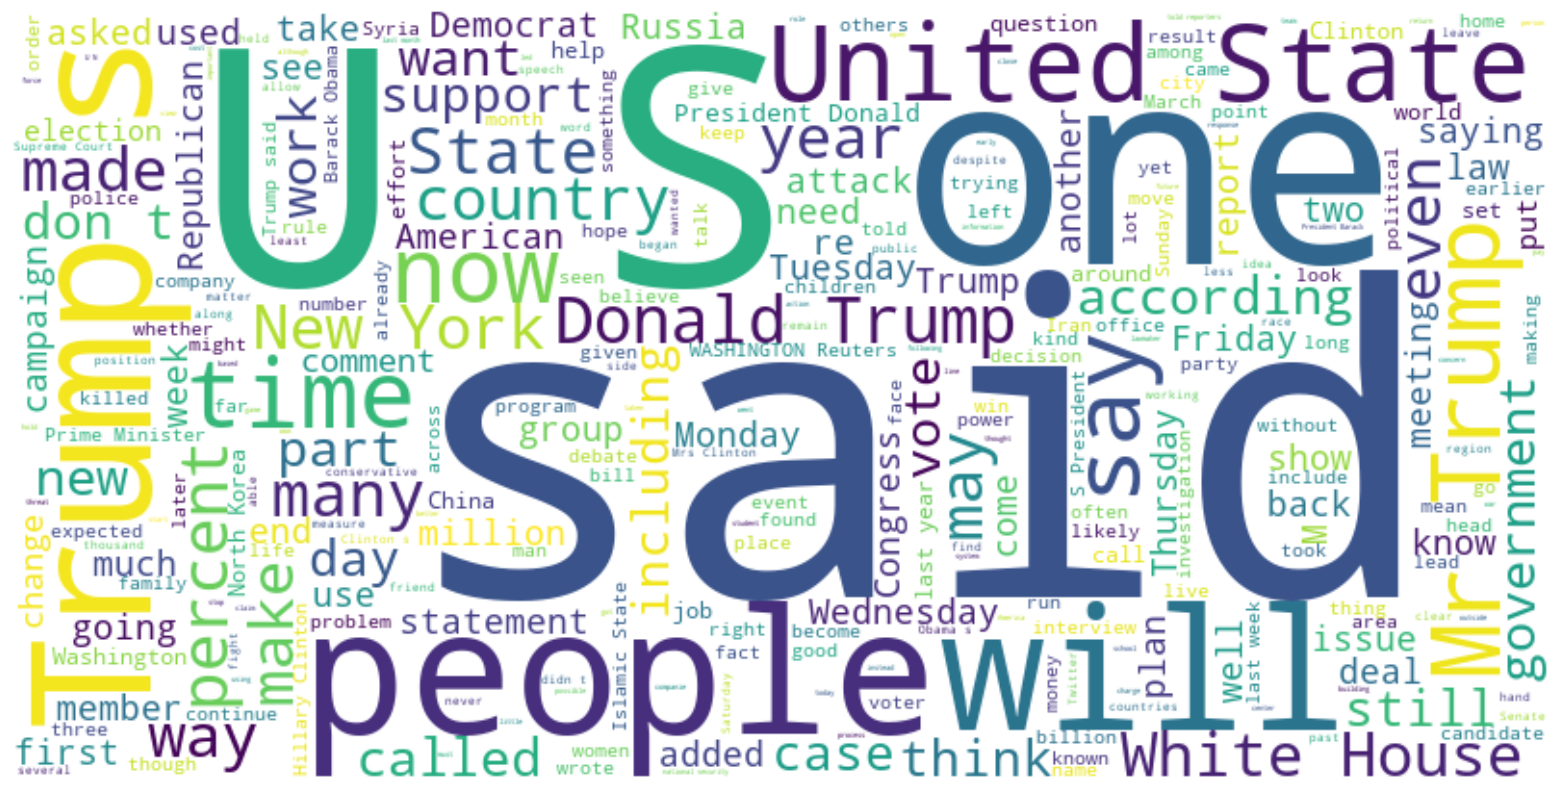

In [21]:
fake_news = X_train[y_train == 0]
real_news = X_train[y_train == 1]
fake_texts = ' '.join(text for text in fake_news)
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(fake_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<div id = "rt"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.4 Data Visualization of texts in Real news
    </h3>

</div>

<function matplotlib.pyplot.show(close=None, block=None)>

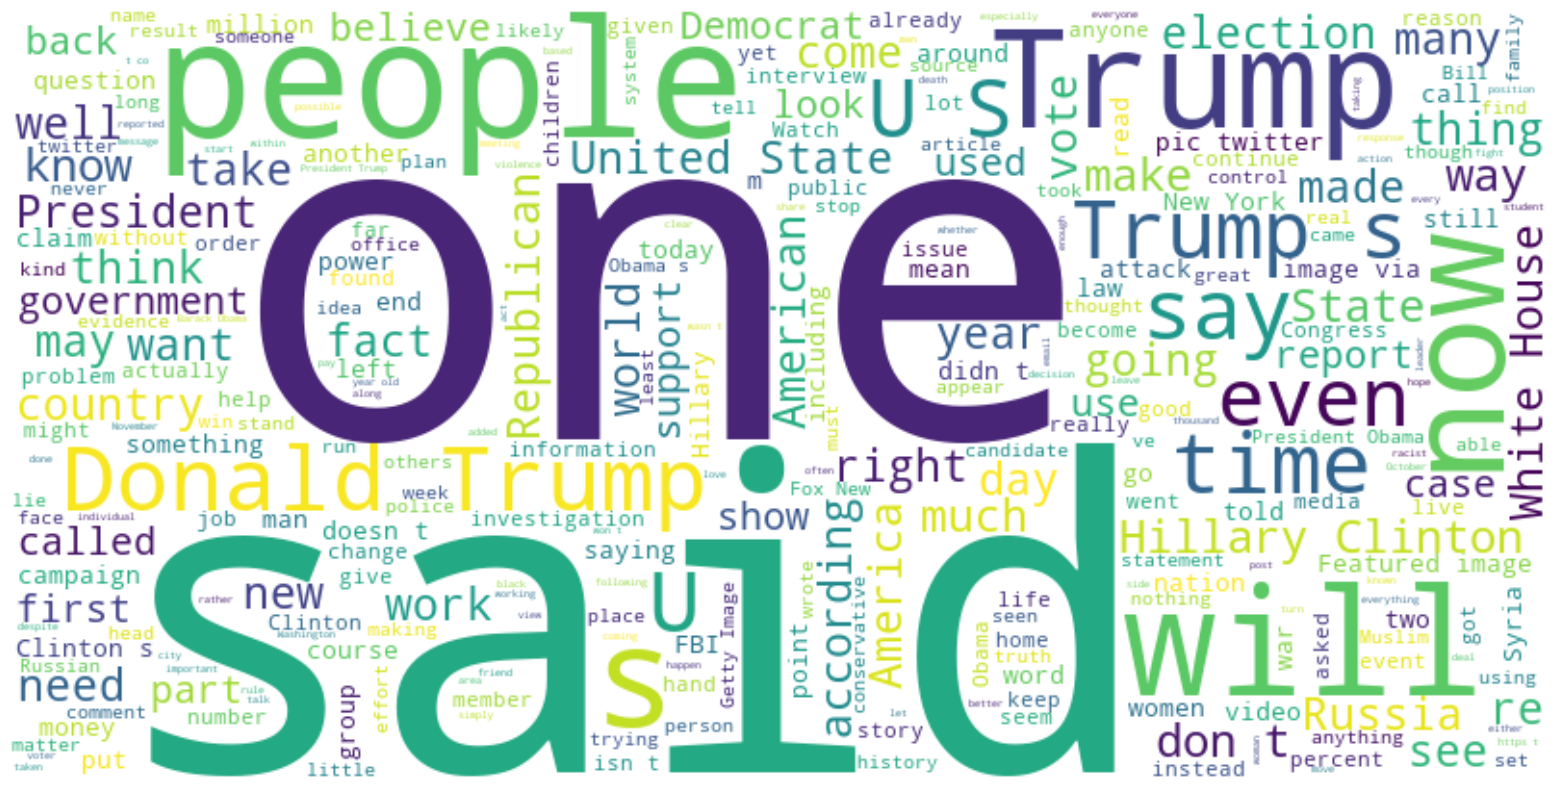

In [22]:
real_texts = ' '.join(text for text in real_news)
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(real_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

<!-- # EDA -->
<div id = "bm"style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>2.Bag of Words Model</b>
    </h1>

</div>

In [18]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)


<!-- # EDA -->
<div id = "nb"style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>3.Training Naive Bayes Model</b>
    </h1>

</div>

In [19]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)


MultinomialNB()

In [ ]:
<div id = "p1"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       3.1 Predictions on NB model 
    </h3>

</div>

In [20]:
pred = nb_classifier.predict(count_test)

<div id = "e1"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       3.2 Evaluation of NB predictions
    </h3>

</div>

In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11640
           1       0.91      0.87      0.89     12165

    accuracy                           0.89     23805
   macro avg       0.89      0.89      0.89     23805
weighted avg       0.89      0.89      0.89     23805



<div style = "height: 65px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="
              color:black;
               text-align: center;
               ">
        <i><b>Accuracy achieved using Naive Bayes Model : 89%</b></i>
    </h3>

</div>

<div id = "cm1"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       3.3 Confusion Matrix
    </h3>

</div>

Text(70.72222222222221, 0.5, 'Real Labels')

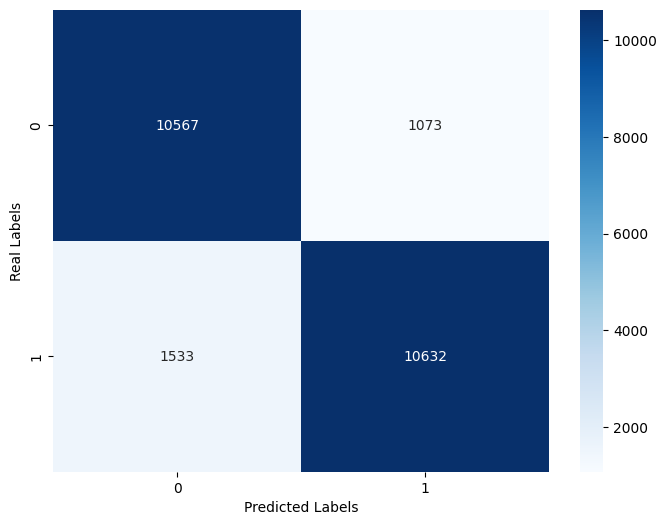

In [22]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,pred), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

<!-- # EDA -->
<div id = "rm" style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>4.Training Random Forest Model</b>
    </h1>

</div>

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with optimized parameters
model_rf = RandomForestClassifier(
    n_estimators=100,       # Reduce to 100 trees to speed up training
    max_depth=20,           # Limit the depth of each tree (20 is a good starting point)
    max_features='sqrt',    # Use sqrt(number of features) at each split for faster training
    random_state=42         # Set random state for reproducibility
)

# Train the Random Forest model
model_rf.fit(count_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [ ]:
<div id = "p2"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       4.1 Predictions on Random Forest Classifier
    </h3>

</div>

In [25]:
pred2 = model_rf.predict(count_test)

In [ ]:
<div id = "e2"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       4.2 Evaluation of RF Classifier Predictions
    </h3>

</div>

In [26]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     11640
           1       0.84      0.93      0.89     12165

    accuracy                           0.88     23805
   macro avg       0.88      0.87      0.88     23805
weighted avg       0.88      0.88      0.88     23805



In [29]:
if isinstance(X_test, pd.DataFrame):  # If X_test is a DataFrame
    news_item = X_test.iloc[10]  # Use .iloc for row access by index
elif isinstance(X_test, (list, np.ndarray)):  # If it's a list or array
    news_item = X_test[10]
else:
    news_item = list(X_test)[10]  # Convert to list if another format

print("Selected News Item:", news_item)

# Transform and predict
X_new = count_test[10]
X_new_reshaped = X_new.reshape(1, -1)  # Ensure it's 2D for prediction
prediction = model.predict(X_new_reshaped)

print("Prediction:", prediction)
if prediction == 0:
    print('The news is fake')
else:
    print('The news is real')

Selected News Item: BEIJING (Reuters) - Chinese authorities have collected DNA and other biometric data from the whole population of the volatile western region of Xinjiang, Human Right Watch said on Wednesday, denouncing the campaign as a gross violation of international norms. Hundreds of people have been killed in Xinjiang in the past few years in violence between Uighurs, a mostly Muslim people, and ethnic majority Han Chinese, which Beijing blames on Islamist militants. The unrest has fueled a sweeping security crackdown there, including mass rallies by armed police, tough measures that rights advocates say restrict religious and cultural expression, and widespread surveillance. Police are responsible for collecting pictures, fingerprints, iris scans and household registration information, while health authorities should collect DNA samples and blood type information as part of a  Physicals for All  program, the New York-based group said in a statement, citing government a documen

<div style = "height: 65px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="
              color:black;
               text-align: center;
               ">
        <i><b>Accuracy achieved using Random Forest Model : 94%</b></i>
    </h3>

</div>

<div id = "cm2" style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       4.3 Confusion Matrix
    </h3>

</div>

Text(70.72222222222221, 0.5, 'Real Labels')

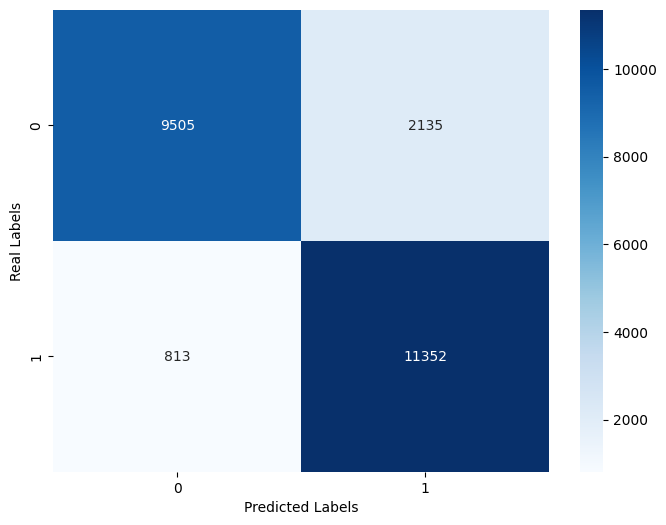

In [27]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,pred2), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)

# Select and display the news item at index 5
if isinstance(X_test, pd.DataFrame):  # If X_test is a DataFrame
    news_item = X_test.iloc[10]  # Use .iloc for row access by index
elif isinstance(X_test, (list, np.ndarray)):  # If it's a list or array
    news_item = X_test[10]
else:
    news_item = list(X_test)[10]  # Convert to list if another format

print("Selected News Item:", news_item)

# Transform and predict
X_new = count_test[10]
X_new_reshaped = X_new.reshape(1, -1)  # Ensure it's 2D for prediction
prediction = nb_classifier.predict(X_new_reshaped)

print("Prediction:", prediction)
if prediction == 0:
    print('The news is fake')
else:
    print('The news is real')

# Optionally, evaluate the classifier on the full test set
pred = nb_classifier.predict(count_test)
print(classification_report(y_test, pred))



Selected News Item: BEIJING (Reuters) - Chinese authorities have collected DNA and other biometric data from the whole population of the volatile western region of Xinjiang, Human Right Watch said on Wednesday, denouncing the campaign as a gross violation of international norms. Hundreds of people have been killed in Xinjiang in the past few years in violence between Uighurs, a mostly Muslim people, and ethnic majority Han Chinese, which Beijing blames on Islamist militants. The unrest has fueled a sweeping security crackdown there, including mass rallies by armed police, tough measures that rights advocates say restrict religious and cultural expression, and widespread surveillance. Police are responsible for collecting pictures, fingerprints, iris scans and household registration information, while health authorities should collect DNA samples and blood type information as part of a  Physicals for All  program, the New York-based group said in a statement, citing government a documen

<!-- # EDA -->
<div id = "rm" style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>5.Training Logistic Regression Model</b>
    </h1>

</div>

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Logistic Regression with optimized parameters for faster training
model_logreg = LogisticRegression(max_iter=100, solver='saga')  # 'saga' is efficient for large/sparse data
model_logreg.fit(count_train, y_train)

C:\Users\Chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

<div id = "p2"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       5.1 Predictions on Logistic Regression
    </h3>

</div>

pred_logreg = model_logreg.predict(count_test)

In [ ]:
<div id = "e2"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       5.2 Evaluation of Logistic Regression Predictions
    </h3>

</div>

In [30]:


print("Logistic Regression Report")
print(classification_report(y_test, pred_logreg))


Logistic Regression Report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     11640
           1       0.94      0.92      0.93     12165

    accuracy                           0.93     23805
   macro avg       0.93      0.93      0.93     23805
weighted avg       0.93      0.93      0.93     23805



In [ ]:
<div id = "e2"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       5.3 Confusion Matrix
    </h3>

</div>

Text(70.72222222222221, 0.5, 'Real Labels')

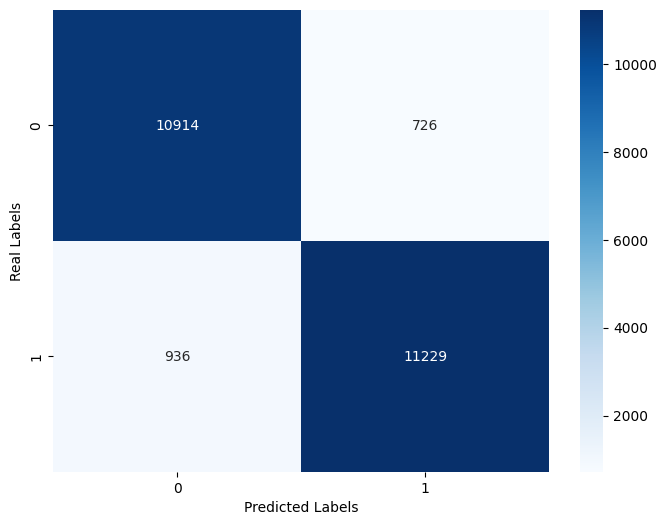

In [33]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,pred_logreg), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

<div id = "e2"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       6. Comparative Analysis of each model
    </h3>

</div>

In [31]:
# Assuming y_test and predictions (pred_svc, pred_logreg, etc.) are available for each model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store model names and their metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Function to add metrics for a model
def add_metrics(name, y_test, y_pred):
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    metrics['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    metrics['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))

# After each model's classification report, call this function to add metrics
# Example for Support Vector Classifier (SVC)


# Repeat for each model
add_metrics("Logistic Regression", y_test, pred_logreg)

add_metrics("Random Forest", y_test, pred2)
add_metrics("Naive Bayes", y_test, pred)


<Figure size 1200x800 with 0 Axes>

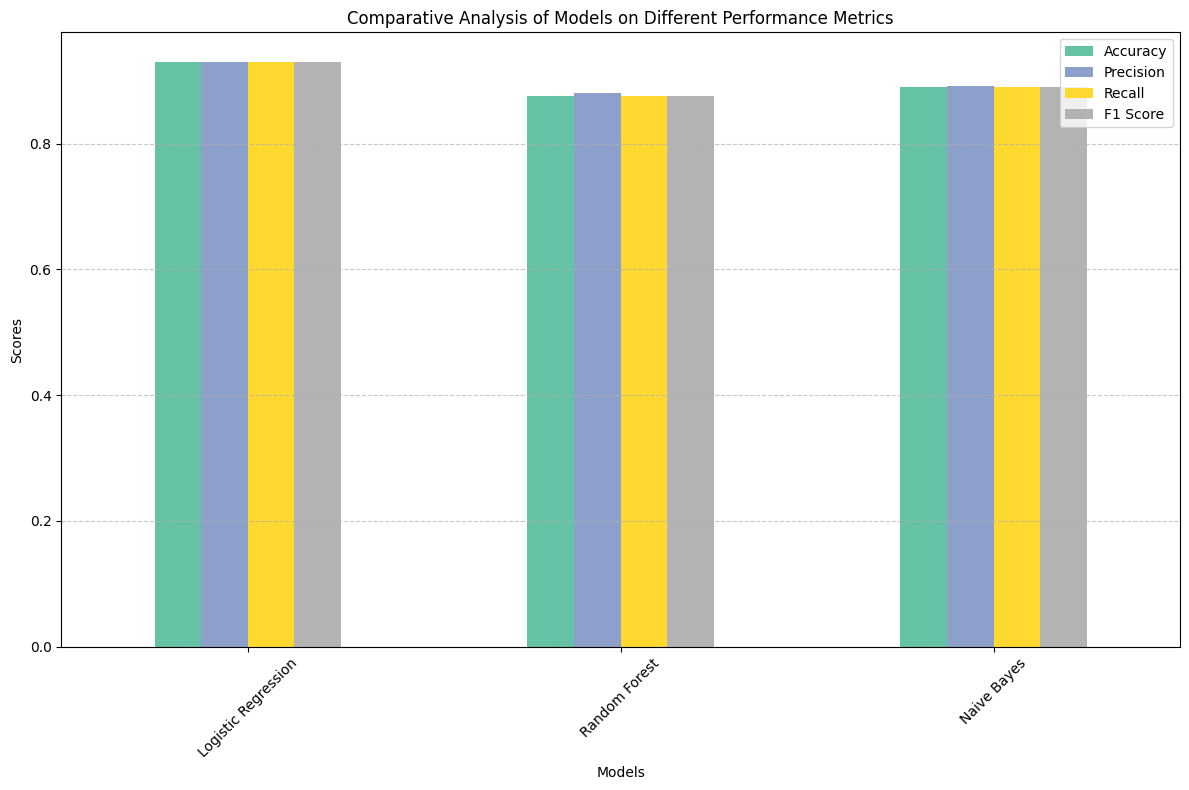

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plotting the comparative analysis
plt.figure(figsize=(12, 8))
metrics_df.set_index('Model').plot(kind='bar', stacked=False, colormap="Set2", figsize=(12, 8))
plt.title("Comparative Analysis of Models on Different Performance Metrics")
plt.ylabel("Scores")
plt.xlabel("Models")
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [40]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Create an input text box for entering news text
news_input = widgets.Textarea(
    value='',
    placeholder='Enter the news article text here...',
    description='News:',
    layout=widgets.Layout(width='90%', height='100px')
)

# Button to trigger prediction
predict_button = widgets.Button(
    description="Check if Fake",
    button_style='primary',
    layout=widgets.Layout(width='20%')
)

# Output area to display the result
output = widgets.Output()

# Define function to preprocess and predict
def check_fake_news(button):
    with output:
        output.clear_output()
        
        # Get the text input
        news_text = news_input.value
        
        # Preprocess and transform the input text
        news_vector = count_vectorizer.transform([news_text])  # Transform input using trained vectorizer
        
        # Predict using the trained model
        prediction = model_logreg.predict(news_vector)
        
        # Display the result
        if prediction == 0:
            print("The news is fake.")
        else:
            print("The news is real.")

# Attach the function to the button click
predict_button.on_click(check_fake_news)

# Display the input box, button, and output area in the notebook
display(news_input, predict_button, output)


Textarea(value='', description='News:', layout=Layout(height='100px', width='90%'), placeholder='Enter the new…

Button(button_style='primary', description='Check if Fake', layout=Layout(width='20%'), style=ButtonStyle())

Output()

<div style = "height: 100px;
  width: 800px;
  background-color: #e2e1e9;">
    <p style="padding: 10px;
              color:black;
              text-align:center;">
        <b>Thank you for reading. <br></br> Please do upvote if you liked the notebook If you have any suggestions please let me know<b>
    </p>

</div>